# Exploratory Data Analysis in Action - EDA: Airplanes



In this section we explore the [_Arial Bombing Data Set_](https://www.kaggle.com/usaf/world-war-ii) and apply techniques referred to as __Exploratory Data Analysis__.

**Import statements**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Global settings**

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100
#pd.set_option('display.max_colwidth', -1)
plt.rcParams["figure.figsize"] = [15,6]

**Load data set**

In [3]:
import pickle
gdf_europe = pickle.load( open( "../datasets/gdf_europe.p", "rb" ) )
europe = pickle.load(open( "../datasets/europe.p", "rb" ) )
germany = pickle.load(open("../datasets/germany.p", "rb"))
gdf_germany = pickle.load(open("../datasets/gdf_germany.p", "rb"))

## Research questions 

__@Airplanes__
- Q1: Which type of airplane types was mostly engaged over?
- Q2: At what height do airplanes operate? At what height to the 10 most common airplane types operate?
- Q3: Which type of airplane carried the heaviest bombs? Which were the 10 most dangerous airplane types with respect to carried explosives?
- Q4: Which Allied Force uses which airplane when and where?

In [4]:
df_airpl = gdf_europe.copy()

In [5]:
df_airpl.columns

Index(['Mission ID', 'Mission Date', 'Country', 'Aircraft Series',
       'Target Country', 'Target City', 'Target Type', 'Target Industry',
       'Target Latitude', 'Target Longitude', 'Attacking Aircraft',
       'High Explosives Weight (Tons)', 'Total Weight (Tons)', 'year', 'month',
       'day', 'Altitude (meters)', 'geometry'],
      dtype='object')

> **Q1: Which type of airplane is mostly engaged?**

In [6]:
df_airpl["Aircraft Series"].unique()

array(['A36', 'LGT', 'B17', 'GB17', 'HVY', 'B26', 'B25', 'A20', 'GB24',
       'B24', 'OB24', 'SB24', 'A26', 'LIB', 'OB17', 'HALI', 'SB17',
       'HAMP', '0B24', 'BLEN', 'WELL', 'MED', '0B17', 'WHIT', 'STIR',
       'ALBA', 'BATT', 'MANC', 'SWORD', 'AUDA', 'VALE', 'MARY', 'BEAU',
       'HURR', 'TOM', nan, 'BEAUF'], dtype=object)

In [7]:
df_airpl["Aircraft Series"].value_counts()

B17      28909
B24      17981
B26      11256
B25       7939
GB17      7902
A20       7440
HVY       6102
WELL      5585
A26       4108
LGT       3621
HAMP      3284
WHIT      3049
GB24      2743
BLEN      2616
MED       2330
A36        990
OB24       934
SB17       829
LIB        523
OB17       436
SB24       416
STIR       393
HALI       276
MANC       152
0B24       105
0B17        40
SWORD       26
BATT        20
AUDA        18
ALBA        14
BEAUF        6
VALE         5
MARY         5
TOM          4
HURR         2
BEAU         2
Name: Aircraft Series, dtype: int64

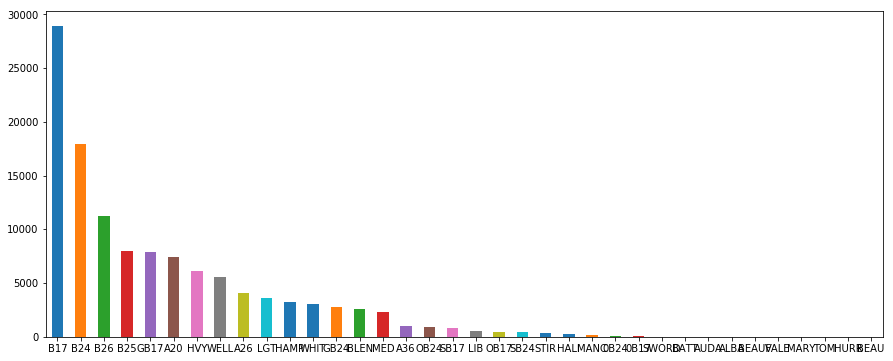

In [8]:
df_airpl["Aircraft Series"].value_counts().plot.bar(rot=0);

> **Q2: At what height do airplanes operate? At what height to the 10 most common airplane types operate?**

In [9]:
df_airpl.groupby("Aircraft Series")["Altitude (meters)"].agg(["mean", "min", "max"]).dropna()

,mean,min,max
Aircraft Series,,,
0B17,7341.061818,5791.20,8534.40
0B24,6665.298667,5242.56,7863.84
A20,2431.591011,30.48,12801.60
A26,2171.854323,30.48,5181.60
B17,7135.014894,0.00,14173.20
B24,6334.094101,0.00,9601.20
B25,2866.751703,0.00,6096.00
B26,3152.550706,30.48,5486.40
BEAUF,0.000000,0.00,0.00


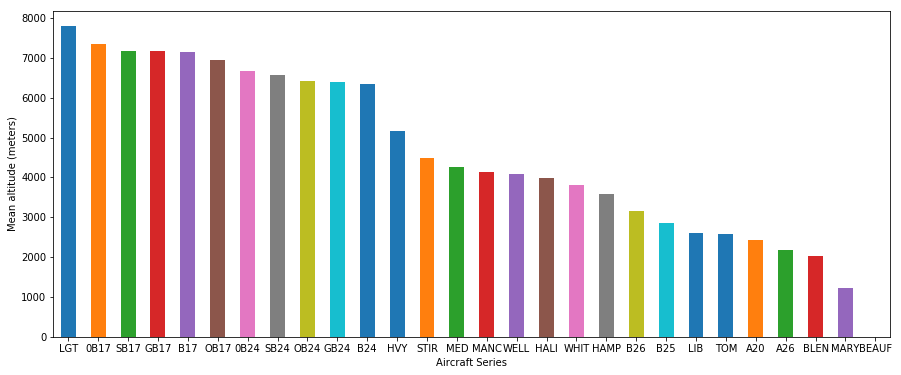

In [10]:
df_airpl.groupby("Aircraft Series")["Altitude (meters)"].mean().dropna().sort_values(ascending=False).plot.bar(rot=0)
plt.ylabel("Mean altitude (meters)");

In [11]:
list_ten_most_common = df_airpl["Aircraft Series"].value_counts()[:10].index
list_ten_most_common

Index(['B17', 'B24', 'B26', 'B25', 'GB17', 'A20', 'HVY', 'WELL', 'A26', 'LGT'], dtype='object')

In [12]:
ten_most_common = df_airpl.loc[df_airpl["Aircraft Series"].isin(list_ten_most_common)]
ten_most_common.shape

(100843, 18)

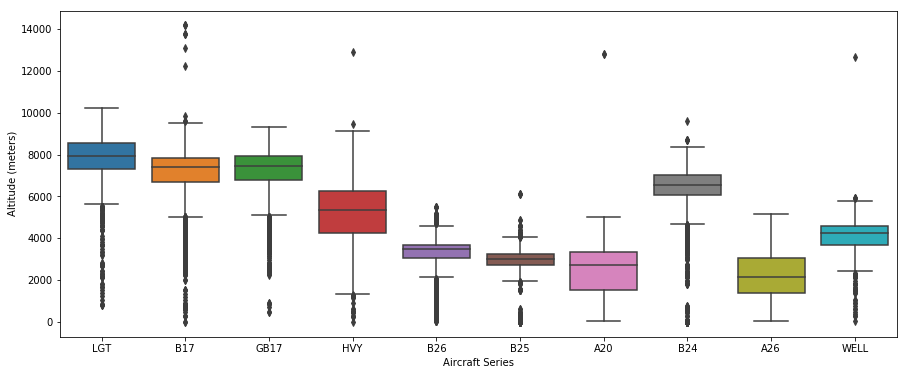

In [13]:
sns.boxplot(x="Aircraft Series", y="Altitude (meters)", data=ten_most_common);

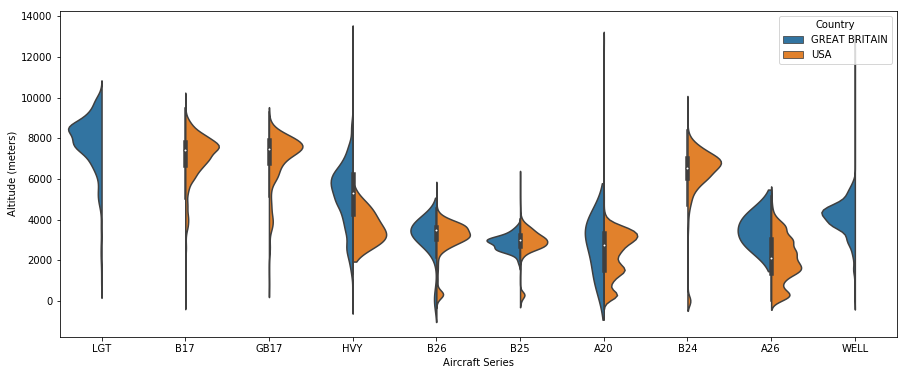

In [14]:
sns.violinplot(x="Aircraft Series", y="Altitude (meters)", hue="Country", split=True, data=ten_most_common);

> **Q3: Which type of airplane carried the heaviest bombs? Which were the 10 most dangerous airplane types with respect to carried explosives?**

In [15]:
df_airpl.columns

Index(['Mission ID', 'Mission Date', 'Country', 'Aircraft Series',
       'Target Country', 'Target City', 'Target Type', 'Target Industry',
       'Target Latitude', 'Target Longitude', 'Attacking Aircraft',
       'High Explosives Weight (Tons)', 'Total Weight (Tons)', 'year', 'month',
       'day', 'Altitude (meters)', 'geometry'],
      dtype='object')

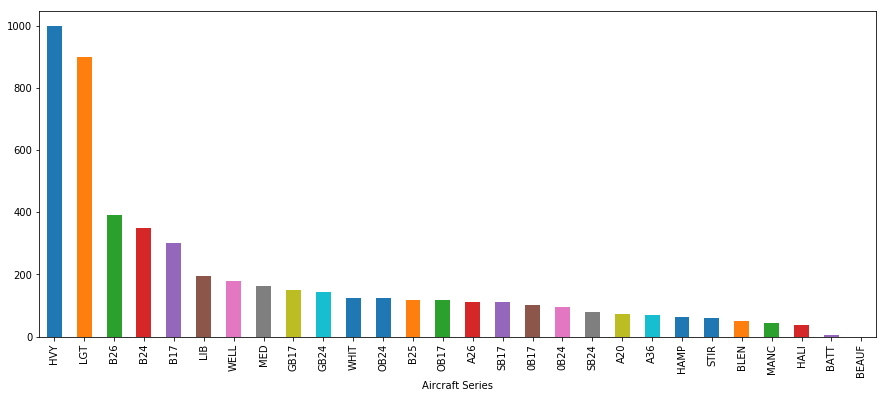

In [16]:
(df_airpl.groupby('Aircraft Series')['High Explosives Weight (Tons)'].
 max().
 dropna().
 sort_values(ascending=False).
 plot.bar())

In [17]:
list_ten_dangerous = (df_airpl.groupby('Aircraft Series')['High Explosives Weight (Tons)'].
                      max().sort_values(ascending=False).
                      dropna()[:10].index)
ten_dangerous = df_airpl.loc[df_airpl["Aircraft Series"].isin(list_ten_dangerous)]
ten_dangerous.shape

(86952, 18)

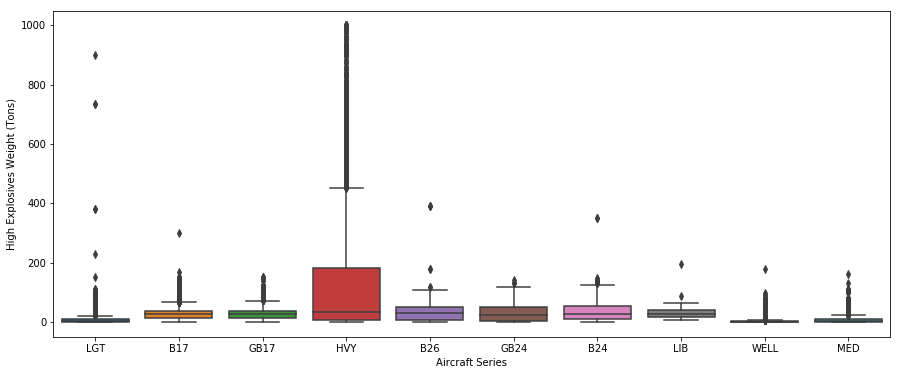

In [18]:
sns.boxplot(x="Aircraft Series", y="High Explosives Weight (Tons)", data=ten_dangerous);

> **Q4: Which Allied Force uses which airplane when and where?**   
_This question is for sure a huge one. We suggest to write a function (or script) that plots  for each year the Allied attacks over Europe for any specified airplane type._

In [19]:
df_airpl['Aircraft Series'].unique()

array(['A36', 'LGT', 'B17', 'GB17', 'HVY', 'B26', 'B25', 'A20', 'GB24',
       'B24', 'OB24', 'SB24', 'A26', 'LIB', 'OB17', 'HALI', 'SB17',
       'HAMP', '0B24', 'BLEN', 'WELL', 'MED', '0B17', 'WHIT', 'STIR',
       'ALBA', 'BATT', 'MANC', 'SWORD', 'AUDA', 'VALE', 'MARY', 'BEAU',
       'HURR', 'TOM', nan, 'BEAUF'], dtype=object)

In [20]:
def plot_airplane_type_over_europe(gdf, airplane="B17", 
                                   years=[1940, 1941 ,1942, 1943, 1944, 1945], 
                                   kdp=False, aoi=europe):
    fig = plt.figure(figsize=(16,12))
    for e, y in enumerate(years):
        _gdf = gdf.loc[(gdf["year"]==y) & (gdf["Aircraft Series"]==airplane)].copy()
        _gdf.Country.replace(np.nan, "unknown", inplace=True)
        ax = fig.add_subplot(3,2,e+1)
        ax.set_aspect('equal')
        aoi.plot(ax=ax, facecolor='lightgray', edgecolor="white")
        if _gdf.shape[0] > 2:
            if kdp:
                sns.kdeplot(_gdf['Target Longitude'], _gdf['Target Latitude'], 
                            cmap="viridis", shade=True, shade_lowest=False, bw=0.25, ax=ax)   
            else:
                _gdf.plot(ax=ax, marker='o', cmap='Set1', categorical=True,
                          column='Country', legend=True, markersize=5, alpha=1)
        ax.set_title("Year: " + str(y), size=16)
    plt.tight_layout()
    plt.suptitle("Attacks of airplane {} for different years".format(airplane), size=22)
    plt.subplots_adjust(top=0.92)
    return fig, ax

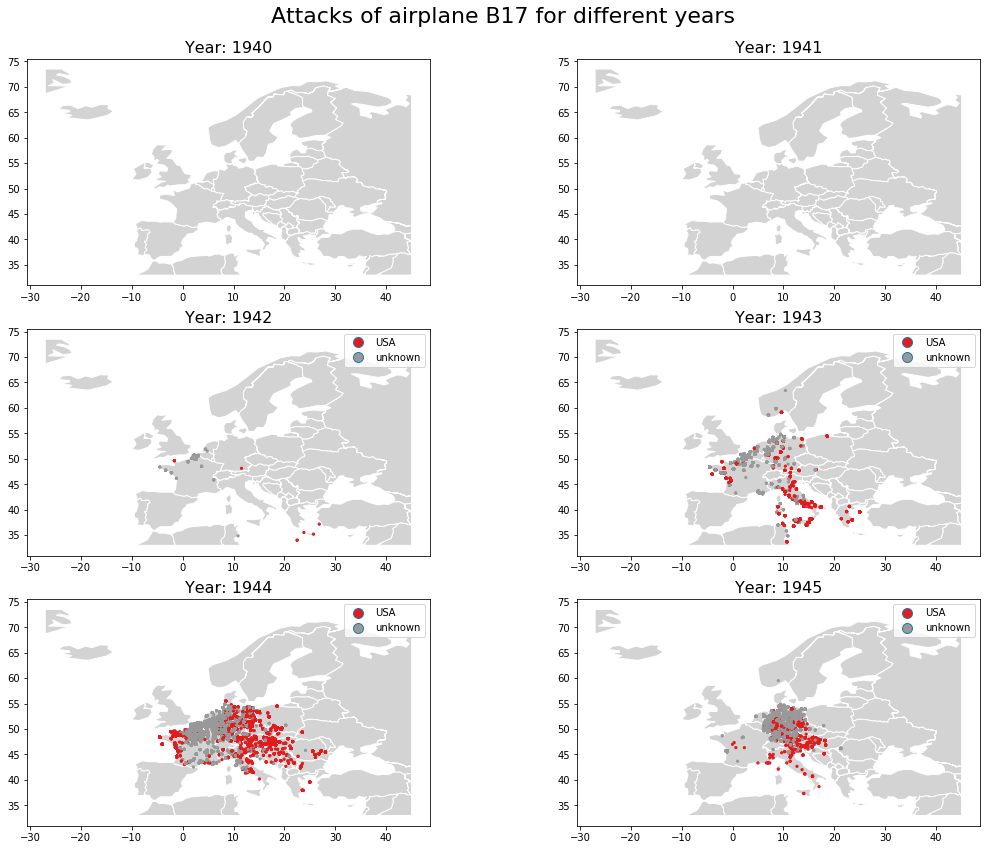

In [21]:
plot_airplane_type_over_europe(df_airpl, airplane="B17", kdp=False);